In [1]:
from gurobipy import *
from math import *
import random
import itertools

In [2]:
"""

Gambella, C., Lodi, A., & Vigo, D. (2018). 
Exact solutions for the carrier–vehicle traveling salesman problem. 
Transportation Science, 52(2), 320-330.

https://drive.google.com/file/d/1syspfeLzCdjhjpBaHUtMKN6TImRcPu0A/view

"""


'\n\nGambella, C., Lodi, A., & Vigo, D. (2018). \nExact solutions for the carrier–vehicle traveling salesman problem. \nTransportation Science, 52(2), 320-330.\n\nhttps://drive.google.com/file/d/1syspfeLzCdjhjpBaHUtMKN6TImRcPu0A/view\n\n'

In [3]:
"""
#random n coordinates
n = 10
random_n_list = list(itertools.product(range(0, 100), range(0, 100)))
#print(random.sample(random_n_list, n))
q=[(0,0)]+random.sample(random_n_list, n)
print(q)
"""

'\n#random n coordinates\nn = 10\nrandom_n_list = list(itertools.product(range(0, 100), range(0, 100)))\n#print(random.sample(random_n_list, n))\nq=[(0,0)]+random.sample(random_n_list, n)\nprint(q)\n'

In [4]:
n=7
#q=((0,0),(48,48),(0,40),(0,50),(1,49),(46,50),(46,46),(50,48),(0,0),(30,5),(30,0));
q=((0,0),(0,20),(0,50),(1,49),(46,50),(46,46),(50,48),(30,5),(30,0));

In [5]:

p_o=(0,0)
p_f=(0,0)
#q=((0,0),(0,40)  ,(25,25) ,(25,28) , (40,40) , (50,0),(25,26) , (26,25) , (24,24),(25,25),(30,25),(25,10),(20,5),(30,0) , (15,33)  , (19,0)  , (15,20)  , (30,23) , (0,20) , (43,0), (25,10)   );
V_v=90
V_c=18
a=1/3

In [6]:
# Create a new model
m = Model("MISOCP_2017_new")


Academic license - for non-commercial use only


In [7]:
# Create variables
Qx = {};
Qy = {};

w = {};

pto_x= {};
pto_y= {};

pl_x= {};
pl_y= {};


t1= {};
t2= {};

t= {};

T= {};

#for SOCP
Cx= {};
Cy= {};
C= {};

In [8]:
for i in range(1, n+1):
    Qx[i] = m.addVar(vtype = 'C',name='Qx[%s]'%i);
    Qy[i] = m.addVar(vtype = 'C',name='Qy[%s]'%i);
    
    pto_x[i] = m.addVar(vtype = 'C',name='pto_x[%s]'%i);
    pto_y[i] = m.addVar(vtype = 'C',name='pto_y[%s]'%i);
    
    pl_x[i] = m.addVar(vtype = 'C',name='pl_x[%s]'%i);
    pl_y[i] = m.addVar(vtype = 'C',name='pl_y[%s]'%i);
    
    t1[i] = m.addVar(lb=0.0,vtype = 'C',name='t1[%s]'%i);
    t2[i] = m.addVar(lb=0.0,vtype = 'C',name='t2[%s]'%i);
    
    t[i] = m.addVar(lb=0.0,vtype = 'C',name='t[%s]'%i);
    
    T[i] = m.addVar(lb=0.0,vtype = 'C',name='T[%s]'%i);
    
    

    for j in range(1, n+1):
        w[i,j] = m.addVar(vtype = 'B',name='w[%s,%s]'%(i,j));
        
    
T[n+1] = m.addVar(lb=0.0,vtype = 'C',name='T[%s]'%(n+1));
m.update()

In [9]:
# Add constraint: 
ctr=0;

#C5
ctr=ctr+1;
    
Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C5');
Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C5');
C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C5');
    
    
m.addConstr( Cx[ctr]  == p_o[0]-pto_x[1], 'C.5x.1'); 
m.addConstr( Cy[ctr]  == p_o[1]-pto_y[1], 'C.5y.1');
m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C.5.2');
m.addConstr( C[ctr]-(V_c*T[1])  == 0, 'C.5.3');


#C7
ctr=ctr+1;
    
Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx.C7');
Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy.C7');
C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C.C7');
    
    
m.addConstr( Cx[ctr]  == p_f[0]-pl_x[n], 'C.7x.1'); 
m.addConstr( Cy[ctr]  == p_f[1]-pl_y[n], 'C.7y.1');
m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C.7.2');
m.addConstr( C[ctr]-(V_c*T[n+1])  == 0, 'C.7.3');



for i in range(1, n+1):
    
    #C8
    m.addConstr( t1[i] + t2[i] - t[i] <= 0.0, 'C.8.[%s]'%i);
    
    
    #C2
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx[%s].C2'%i);
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy[%s].C2'%i);
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C[%s].C2'%i);
    
                       
    m.addConstr( Cx[ctr]  == Qx[i]-pto_x[i], 'C.2x.1.[%s]'%i); 
    m.addConstr( Cy[ctr]  == Qy[i]-pto_y[i], 'C.2y.1.[%s]'%i);
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C.2.2.[%s]'%i);
    m.addConstr( C[ctr]-(V_v*t1[i])  == 0, 'C.2.3.[%s]'%i);
    
    #C3
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx[%s].C3'%i);
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy[%s].C3'%i);
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C[%s].C3'%i);
    
    
    m.addConstr( Cx[ctr]  == Qx[i]-pl_x[i], 'C.3x.1.[%s]'%i); 
    m.addConstr( Cy[ctr]  == Qy[i]-pl_y[i], 'C.3y.1.[%s]'%i);
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C.3.2.[%s]'%i);
    m.addConstr( C[ctr]-(V_v*t2[i])  == 0, 'C.3.3.[%s]'%i);
    
    
    #C4
    ctr=ctr+1;
    
    Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx[%s].C4'%i);
    Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy[%s].C4'%i);
    C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C[%s].C4'%i);
    
    
    m.addConstr( Cx[ctr]  == pl_x[i]-pto_x[i], 'C.4x.1.[%s]'%i); 
    m.addConstr( Cy[ctr]  == pl_y[i]-pto_y[i], 'C.4y.1.[%s]'%i);
    m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C.4.2.[%s]'%i);
    m.addConstr( C[ctr]-(V_c*t[i])  == 0, 'C.4.3.[%s]'%i);
    
    
    
    #C9
    m.addConstr( Qx[i]  == quicksum(w[i,j]*q[j][0] for j in range(1,n+1)), 'C.9x.[%s]'%i); 
    m.addConstr( Qy[i]  == quicksum(w[i,j]*q[j][1] for j in range(1,n+1)), 'C.9y.[%s]'%i); 
    
    #C10
    m.addConstr( quicksum(w[i,j] for j in range(1,n+1))  == 1, 'C.10.[%s]'%i);
    
    
    #C14
    m.addConstr( t[i]  <= a, 'C.14b.[%s]'%i);
    

    #C6
    if i>1:
        ctr=ctr+1;
        
        Cx[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cx[%s].C6'%i);
        Cy[ctr] = m.addVar(lb=-GRB.INFINITY,vtype = 'C',name='Cy[%s].C6'%i);
        C[ctr] = m.addVar(lb=0.0,vtype = 'C',name='C[%s].C6'%i);
    
    
        m.addConstr( Cx[ctr]  == pl_x[i-1]-pto_x[i], 'C.6x.1.[%s]'%i); 
        m.addConstr( Cy[ctr]  == pl_y[i-1]-pto_y[i], 'C.6y.1.[%s]'%i);
        m.addQConstr( Cx[ctr]*Cx[ctr] + Cy[ctr]*Cy[ctr] <=  C[ctr]*C[ctr], 'C.6.2.[%s]'%i);
        m.addConstr( C[ctr]-(V_c*T[i])  == 0, 'C.6.3.[%s]'%i);
        
        
        
        
    
    
                       
#C11                       
for j in range(1, n+1):
    
    m.addConstr( quicksum(w[i,j] for i in range(1,n+1))  == 1, 'C.11.[%s]'%j);






In [10]:
# Set objective:


obj = quicksum(t[i] for i in range(1,n+1)) +  quicksum(T[i] for i in range(1,n+2))

m.setObjective(obj,GRB.MINIMIZE)

In [11]:
m.optimize()

Optimize a model with 129 rows, 207 columns and 452 nonzeros
Model has 29 quadratic constraints
Variable types: 158 continuous, 49 integer (49 binary)
Coefficient statistics:
  Matrix range     [1e+00, 9e+01]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e-01, 1e+00]
Presolve removed 40 rows and 33 columns
Presolve time: 0.01s
Presolved: 89 rows, 174 columns, 372 nonzeros
Variable types: 111 continuous, 63 integer (49 binary)

Root relaxation: objective 0.000000e+00, 47 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

H    0     0                      12.7600164    0.00000   100%     -    0s
*    0     0               0      12.7600164    0.68798  94.6%     -    0s
H    0     0                       8.3138453    0.68798  91.7%     -    0s
     0     0    3.25006    0   37    8.31385  

In [12]:
obj = m.getObjective()
print("t_m:",obj.getValue(),"hours\n")
print ('runtime is',m.Runtime,"secs\n")
for i in range(1,n+1):
    print("Q", i," : (",Qx[i].X,", ", Qy[i].X,")")

    
    print("takeoff pt", i," : (",pto_x[i].X,", ", pto_y[i].X,")")
    print("landing pt", i," : (",pl_x[i].X,", ", pl_y[i].X,")\n")

t_m: 7.13447727251543 hours

runtime is 1.7145109176635742 secs

Q 1  : ( 0.0 ,  20.0 )
takeoff pt 1  : ( 4.02864167094682 ,  20.244786956745607 )
landing pt 1  : ( 4.872265172444151 ,  24.478104802062063 )

Q 2  : ( 0.0 ,  50.0 )
takeoff pt 2  : ( 7.144132326729047 ,  35.89029797964472 )
landing pt 2  : ( 10.718661270951017 ,  40.70929497729404 )

Q 3  : ( 1.0 ,  49.0 )
takeoff pt 3  : ( 10.71866236530164 ,  40.70929628728975 )
landing pt 3  : ( 16.62708122194735 ,  41.75357885248722 )

Q 4  : ( 46.0 ,  50.0 )
takeoff pt 4  : ( 29.670537902818317 ,  43.0426521408892 )
landing pt 4  : ( 35.636364931289215 ,  43.63364664475383 )

Q 5  : ( 50.0 ,  48.0 )
takeoff pt 5  : ( 35.64811596776796 ,  43.634811223715026 )
landing pt 5  : ( 38.50866599468291 ,  38.3606212017077 )

Q 6  : ( 46.0 ,  46.0 )
takeoff pt 6  : ( 38.256192055871786 ,  38.04619824757981 )
landing pt 6  : ( 34.56039604668657 ,  33.44107664791268 )

Q 7  : ( 30.0 ,  5.0 )
takeoff pt 7  : ( 21.881317016350465 ,  17.6124402929

In [13]:
#m.getVars()

In [14]:
#w

In [15]:
#Qx

In [16]:
#m.Runtime

"\nfor i in range(1,n+1):\n    plt.plot(pto_x[i].X, pto_y[i].X, marker='x',color='b')\n    plt.plot(pl_x[i].X, pl_y[i].X, marker='x',color='b')\n"

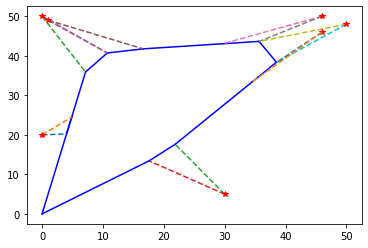

In [18]:
import matplotlib.pyplot as plt

#plt.xlabel("x/km")
#plt.ylabel("y/km")
#figure, axes = plt.subplots()

"""
for i in range(0,n+1):
    plt.plot([l[i,0].X, t[i,0].X],[l[i,1].X,  t[i,1].X], color= 'b')
    for j in range(0,n+1):
        if x[i,j].X==1:
            plt.plot([l[i,0].X, t[j,0].X],[l[i,1].X,  t[j,1].X], color= 'b')
            
"""

plt.plot([0, pl_x[1].X],[ 0,  pl_y[1].X], color= 'b')
plt.plot([0, pl_x[n].X],[ 0,  pl_y[n].X], color= 'b')

for i in range(1,n+1):
    plt.plot([pto_x[i].X, pl_x[i].X],[ pto_y[i].X,  pl_y[i].X], color= 'b')
    if i<n:
        plt.plot([pto_x[i+1].X, pl_x[i].X],[ pto_y[i+1].X,  pl_y[i].X], color= 'b')
    
    
    plt.plot([Qx[i].X ,  pto_x[i].X] ,[Qy[i].X,  pto_y[i].X],linestyle= '--')
    plt.plot([Qx[i].X ,  pl_x[i].X] ,[Qy[i].X,  pl_y[i].X],linestyle= '--')
    plt.plot(q[i][0], q[i][1], marker='*',color='r')
    #draw_circle = plt.Circle((q[i][0], q[i][1]), 5, color='r',fill=False)
    #axes.set_aspect(1)
    #axes.add_artist(draw_circle)
    
"""
for i in range(1,n+1):
    plt.plot(pto_x[i].X, pto_y[i].X, marker='x',color='b')
    plt.plot(pl_x[i].X, pl_y[i].X, marker='x',color='b')
"""